# Heart Rate Series Visualization

This notebook visualizes the fetal and maternal heart rate series from the generated TOF dataset.

In [2]:
import numpy as np
import yaml
import matplotlib.pyplot as plt

# Load the NPZ file
data_path = '../data/generated_tof_set_experiment_0000.npz'
plot_configs = 'plot_config.yaml'

with open(plot_configs, 'r') as f:
    plot_rcParams = yaml.safe_load(f)

plt.rcParams.update(plot_rcParams)
data = np.load(data_path)

# Extract the heart rate series
time_axis = np.linspace(0, 1, 100)

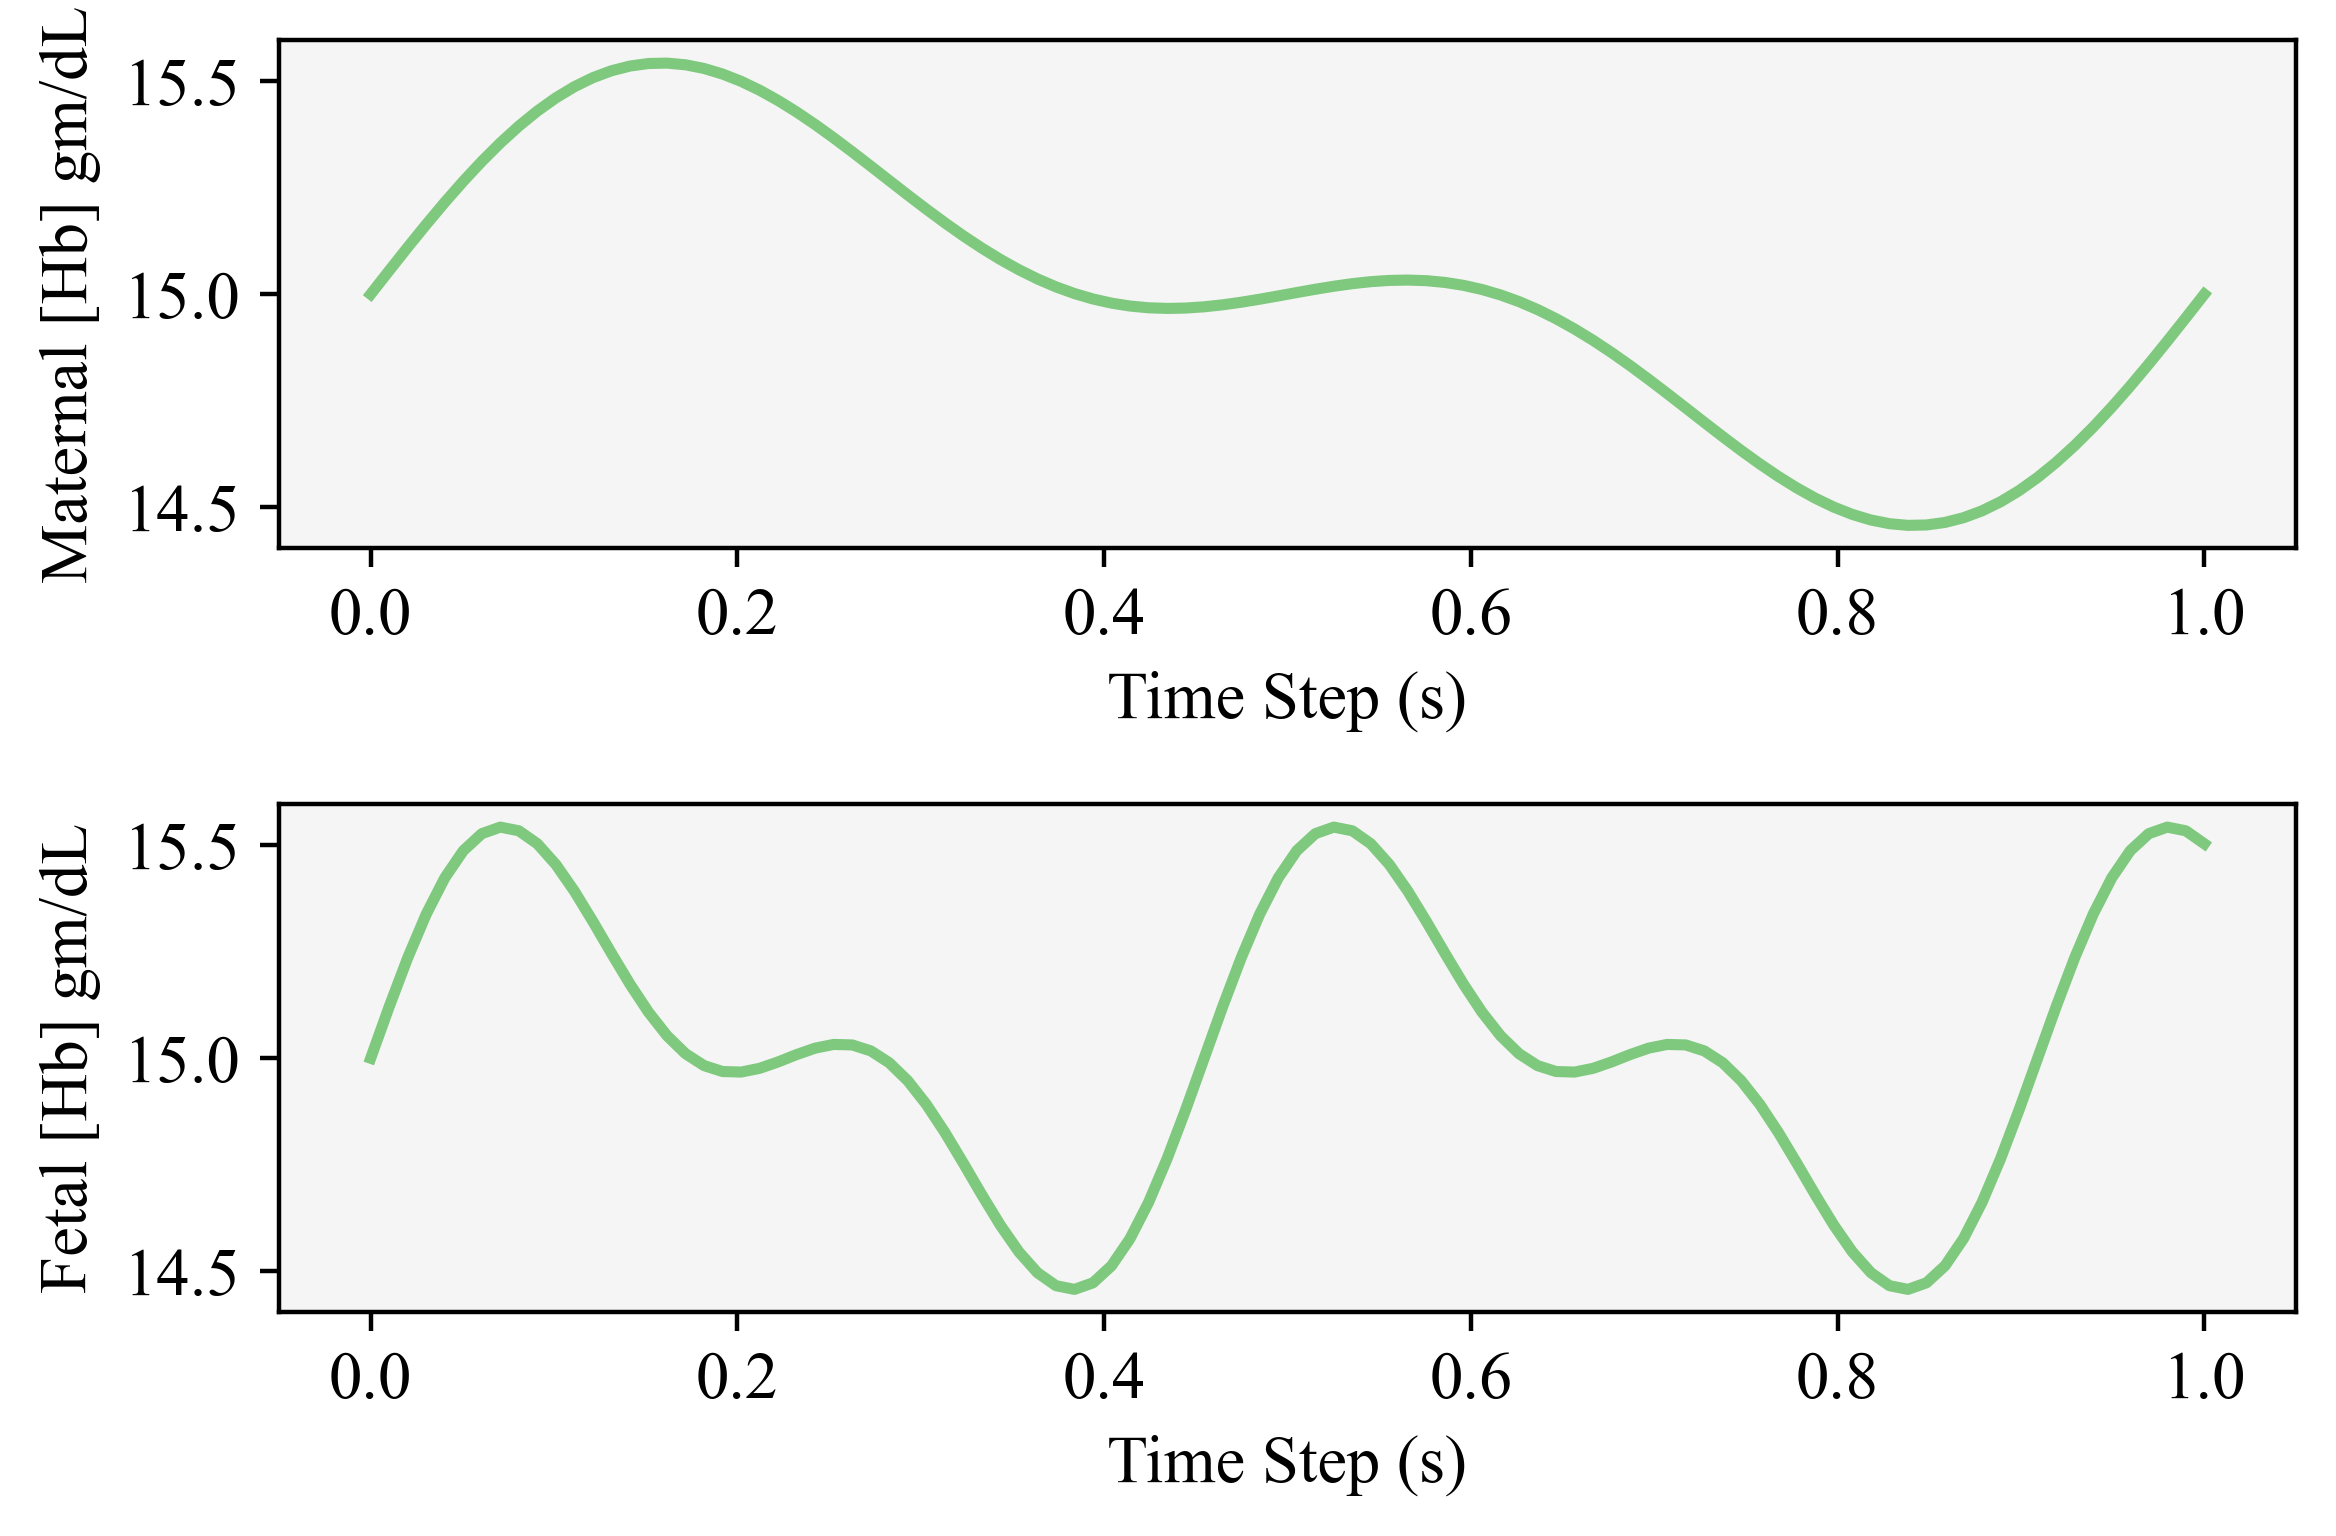

In [3]:
maternal_f = 1.0
fetal_f = 2.2
maternal_hb_base = 15.0
fetal_hb_base = 15.0

maternal_hb_series = (
    maternal_hb_base
    + 0.375 * np.sin(2 * np.pi * maternal_f * time_axis)
    + 0.25 * np.sin(2 * np.pi * 2 * maternal_f * time_axis)
)
fetal_hb_series = (
    fetal_hb_base
    + 0.375 * np.sin(2 * np.pi * fetal_f * time_axis)
    + 0.25 * np.sin(2 * np.pi * 2 * fetal_f * time_axis)
)

fig, ax = plt.subplots(2, 1, figsize=(6, 4))

ax[0].plot(time_axis, maternal_hb_series, label='Maternal Heart Rate', linewidth=2)
ax[1].plot(time_axis, fetal_hb_series, label='Fetal Heart Rate', linewidth=2)
ax[0].set_xlabel('Time Step (s)')
ax[1].set_xlabel('Time Step (s)')
ax[0].set_ylabel('Maternal [Hb] gm/dL')
ax[1].set_ylabel('Fetal [Hb] gm/dL')
ax[0].grid(True, alpha=0.3)
ax[1].grid(True, alpha=0.3)

ax[0].grid(False)
ax[1].grid(False)
ax[0].set_facecolor('#f5f5f5')
ax[1].set_facecolor('#f5f5f5')
plt.tight_layout()
plt.show()

In [4]:
fig.savefig('../figures/heart_rate_series.pdf')
fig.savefig('../figures/heart_rate_series.svg')